In [1]:
# Import required Packets
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import sklearn
import statistics
import math
import seaborn as sns

#### Counter provides a method defined as .most_common([n]). This method returns a list of two-items tuples with the n more common elements and their respective counts. If n is omitted or None, then .most_common() returns all of the elements.


# a) 

In [2]:
#Load the Dataset from CSV files
df = pd.read_csv('Bodyfat.csv')

In [3]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.shape

(252, 15)

In [5]:
# Durchschnitt:1 sum() / len()
def mean1(df):
    # get the number of columns
    shape = df.shape
    shape[1]
    total = 0
    mean_l = []
    for i in df.iloc[:,0:shape[1]]:
        total = sum(df[i])
        mean = total / len(df[i])
        mean_l.append(mean)
    return mean_l

In [6]:
mean1(df)

[1.055573809523809,
 19.15079365079365,
 44.88492063492063,
 178.92440476190478,
 70.14880952380952,
 37.99206349206346,
 100.82420634920639,
 92.55595238095235,
 99.90476190476186,
 59.405952380952364,
 38.59047619047622,
 23.10238095238097,
 32.273412698412706,
 28.663888888888888,
 18.229761904761904]

In [7]:
# Durchschnitt:2 statistics.mean()
def mean2(df):
    # get the number of columns
    shape = df.shape
    shape[1]
    mean_l = []
    for i in df.iloc[:,0:shape[1]]:
        m = statistics.mean(df[i])
        mean_l.append(m)
    return mean_l

In [8]:
mean2(df)

[1.0555738095238094,
 19.150793650793652,
 44.88492063492063,
 178.92440476190475,
 70.14880952380952,
 37.992063492063494,
 100.82420634920635,
 92.55595238095238,
 99.9047619047619,
 59.40595238095238,
 38.59047619047619,
 23.10238095238095,
 32.2734126984127,
 28.663888888888888,
 18.229761904761904]

### -----------------------------------------------------------------------------------

In [9]:
# Median: sorted() odd number and even number
def median1(df):
    shape = df.shape
    shape[1]
    median_l = []
    for i in df.iloc[:,0:shape[1]]:
        df[i] = sorted(df[i])
        if len(df[i]) % 2 != 0: # odd number
            median = df.iloc[int(len(df[i])/2)]
        else: # even number
            median = df.iloc[int(len(df[i])/2) -1] + df.iloc[int(len(df[i])/2)]
            median = median / 2
    median_l.append(median)
    return median_l

In [10]:
median1(df)

[Density      1.0549
 bodyfat     19.2000
 Age         43.0000
 Weight     176.5000
 Height      70.0000
 Neck        38.0000
 Chest       99.6500
 Abdomen     90.9500
 Hip         99.3000
 Thigh       59.0000
 Knee        38.5000
 Ankle       22.8000
 Biceps      32.0500
 Forearm     28.7000
 Wrist       18.3000
 dtype: float64]

In [11]:
# Median: median()
def median2(df):
    shape = df.shape
    shape[1]
    median_l = []
    for i in df.iloc[:,0:shape[1]]:
        median = statistics.median(df[i])
        median_l.append(median)
    return median_l

In [12]:
median2(df)

[1.0549,
 19.2,
 43.0,
 176.5,
 70.0,
 38.0,
 99.65,
 90.95,
 99.3,
 59.0,
 38.5,
 22.8,
 32.05,
 28.7,
 18.3]

### ----------------------------------------------------------------------------

In [13]:
# Quantil: q1-25%, q2-50%, q3-75%
def quantil1(df):
    shape = df.shape
    shape[1]
    q1_l = []
    q2_l = []
    q3_l = []
    for i in df.iloc[:,0:shape[1]]:
        df[i] = sorted(df[i])
        q1 = df.loc[len(df[i]) * 0.25,i]
        q2 = df.loc[len(df[i]) * 0.5,i]
        q3 = df.loc[len(df[i]) * 0.75,i]
        q1_l.append(q1)
        q2_l.append(q2)
        q3_l.append(q3)
    return [q1_l, 
            q2_l, 
            q3_l]

In [14]:
quantil1(df)

[[1.0414,
  12.5,
  36,
  159.25,
  68.25,
  36.4,
  94.4,
  84.6,
  95.5,
  56.0,
  37.0,
  22.0,
  30.2,
  27.3,
  17.6],
 [1.0549,
  19.2,
  43,
  176.75,
  70.0,
  38.0,
  99.7,
  91.0,
  99.3,
  59.0,
  38.5,
  22.8,
  32.1,
  28.7,
  18.3],
 [1.0704,
  25.3,
  54,
  197.0,
  72.25,
  39.5,
  105.6,
  99.7,
  103.6,
  62.5,
  40.0,
  24.0,
  34.4,
  30.0,
  18.8]]

In [15]:
# Quantil: q1-25%, q2-50%, q3-75%
def quantil2(df):
    shape = df.shape
    q1_l = []
    q2_l = []
    q3_l = []
    for i in df.iloc[:,0:shape[1]]:
        q1 = np.quantile(df[i], .25)
        q2 = np.quantile(df[i], .50)
        q3 = np.quantile(df[i], .75)
        q1_l.append(q1)
        q2_l.append(q2)
        q3_l.append(q3)
    return [q1_l, q2_l, q3_l]

In [16]:
quantil2(df)

[[1.0414,
  12.475,
  35.75,
  159.0,
  68.25,
  36.4,
  94.35000000000001,
  84.57499999999999,
  95.5,
  56.0,
  36.975,
  22.0,
  30.2,
  27.3,
  17.6],
 [1.0549,
  19.2,
  43.0,
  176.5,
  70.0,
  38.0,
  99.65,
  90.95,
  99.3,
  59.0,
  38.5,
  22.8,
  32.05,
  28.7,
  18.3],
 [1.0704,
  25.3,
  54.0,
  197.0,
  72.25,
  39.425,
  105.375,
  99.325,
  103.525,
  62.349999999999994,
  39.925,
  24.0,
  34.324999999999996,
  30.0,
  18.8]]

### -----------------------------------------------------------------------------

In [17]:
# Modus most frequently occur mode() function statistics.mode() takes some data and returns its (first) mode
def mode1(df):
    l = []
    for i in df:
        if (len(set(df[i])) == len(df[i])):
            num = -1
            return num
        else:
            m = statistics.mode(df[i])
            l.append(m)
    return l

In [18]:
mode1(df) 

[1.061,
 20.4,
 40,
 152.25,
 71.5,
 38.5,
 99.1,
 88.7,
 98.3,
 58.9,
 39.0,
 22.0,
 30.5,
 27.3,
 18.8]

In [19]:
# example
q = [22.5, 22.6, 22.5, 22.6, 22.0, 22.0]
statistics.mode(q)

22.5

In [20]:
# multimode can return most common value 
def mode2(df):
    l = []
    for i in df:
        if (len(set(df[i])) == len(df[i])):
            num = -1
            return num
        else:
            m = statistics.multimode(df[i])
            l.append(m)
    return l    

In [21]:
mode2(df)

[[1.061],
 [20.4],
 [40],
 [152.25, 167.0, 168.0, 168.25, 170.75, 172.75, 177.25, 179.75, 184.25],
 [71.5],
 [38.5],
 [99.1, 102.7],
 [88.7, 89.7, 100.5],
 [98.3],
 [58.9],
 [39.0],
 [22.0, 22.5, 22.6],
 [30.5, 31.6],
 [27.3, 29.6, 29.8],
 [18.8]]

In [22]:
# The Counter class provides a method defined as .most_common([n]). This method returns a list of two-items tuples with the n more common elements and their respective counts. If n is omitted or None, then .most_common() returns all of the elements.
def mode3(df):
    mode_l = []
    for i in df:
        c = Counter(df[i])
        l = [k for k, v in c.items() if v == c.most_common(1)[0][1]]
        mode_l.append(l)
    return mode_l

In [23]:
mode3(df)

[[1.061],
 [20.4],
 [40],
 [152.25, 167.0, 168.0, 168.25, 170.75, 172.75, 177.25, 179.75, 184.25],
 [71.5],
 [38.5],
 [99.1, 102.7],
 [88.7, 89.7, 100.5],
 [98.3],
 [58.9],
 [39.0],
 [22.0, 22.5, 22.6],
 [30.5, 31.6],
 [27.3, 29.6, 29.8],
 [18.8]]

### ---------------------------------------------------------------------------------- 

In [24]:
# max - min
def span(df):
    l_span = []
    for x in df:
        l_max = max(df[x])
        l_min = min(df[x])
        span = l_max - l_min
        l_span.append(span)
    return l_span

In [25]:
span(df)

[0.1139,
 47.5,
 59,
 244.64999999999998,
 48.25,
 20.1,
 56.89999999999999,
 78.69999999999999,
 62.69999999999999,
 40.099999999999994,
 16.1,
 14.799999999999997,
 20.2,
 13.899999999999999,
 5.599999999999998]

### ----------------------------------------------------------------------------------

### möglich Visualisierung

In [26]:
df.describe()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [27]:
# add new list(mode) into describetable and change it name.
dt = df.describe()
cnt = dt.count()[0]
dt.loc[len(dt)] = mode1(df)
dt = dt.rename(index = {cnt:'mode'})
display(dt)
print(cnt)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000
mode,1.061000,20.400000,40.000000,152.250000,71.500000,38.500000,99.100000,88.700000,98.300000,58.900000,39.000000,22.000000,30.500000,27.300000,18.800000


8


In [28]:
# delete the row of count and std
dt = dt.drop(['count','std'])
dt

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
mean,1.055574,19.150794,44.884921,178.924405,70.14881,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
min,0.995000,0.000000,22.000000,118.500000,29.50000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.25000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.00000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.25000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.75000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000
mode,1.061000,20.400000,40.000000,152.250000,71.50000,38.500000,99.100000,88.700000,98.300000,58.900000,39.000000,22.000000,30.500000,27.300000,18.800000


In [29]:
# add the row of Spannweite
cnt = dt.count()[0]
span = dt.loc['max'] - dt.loc['min']
dt.loc[len(dt)] = span
dt = dt.rename(index = {cnt:'span'})
display(dt)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
mean,1.055574,19.150794,44.884921,178.924405,70.14881,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
min,0.995000,0.000000,22.000000,118.500000,29.50000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.25000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.00000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.25000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.75000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000
mode,1.061000,20.400000,40.000000,152.250000,71.50000,38.500000,99.100000,88.700000,98.300000,58.900000,39.000000,22.000000,30.500000,27.300000,18.800000
span,0.113900,47.500000,59.000000,244.650000,48.25000,20.100000,56.900000,78.700000,62.700000,40.100000,16.100000,14.800000,20.200000,13.900000,5.600000


# welche Information liefern diese Stastiken über die Daten.
example:durch mean können wir wissen, ob die Daten unseres Körper ordnen.
In mathematics, we have to come across a large set of data. To get valuable information about this large set of data, we get help from measures of central tendency. The measures of central tendency provide us with statistical information about this set of information. Mean, median, mode and range are known as four primary measures of central tendency. 


# b)

In [30]:
# todo: you should also add some description for this two Statistik
def var1(df):
    l = []
    for x in df:
        m = statistics.variance(df[x])
        l.append(m)
    return l

In [31]:
var1(df)

[0.00036219548662492856,
 70.03581610067666,
 158.81140517295896,
 863.722718767786,
 13.416512521343199,
 5.909339151331183,
 71.07291769430215,
 116.27474530449629,
 51.32372225384177,
 27.561996300512234,
 5.816801365964713,
 2.872663631189528,
 9.12809507999747,
 4.083192784417885,
 0.8715808195788275]

In [32]:
# Step 1: Find the mean.
# Step 2: For each data point, find the square of its distance to the mean.
# Step 3: Sum the values from Step 2.
# Step 4: Divide by the number of data points.
def var2(df):
    l = []
    for x in df:
        s_distance = []
        mean = statistics.mean(df[x])
        for i in df[x]:
            d = (i-mean)**2
            s_distance.append(d)
        s = sum(s_distance)
        var = s / len(df[x])
        l.append(var)
    return l

In [33]:
var2(df)

[0.0003607582029478457,
 69.7578961955152,
 158.18120118417744,
 860.2952476615649,
 13.363272392290252,
 5.8858893927941525,
 70.79088230662636,
 115.81333758503402,
 51.12005668934236,
 27.45262329931969,
 5.7937188208616766,
 2.8612641723356025,
 9.091872480473674,
 4.066989638447978,
 0.8681221655328782]

### ------------------------------------------------------------------------------------

In [34]:
# standard Deviation
def sd1(df):
    l = []
    for x in df:
        m = np.std(df[x])
        l.append(m)
    return l

In [35]:
sd1(df)

[0.018993635853828662,
 8.352119263726737,
 12.57701082070686,
 29.33079009610148,
 3.655580992440224,
 2.4260851989973786,
 8.413731770541913,
 10.76166054031784,
 7.149829137073306,
 5.239525102461072,
 2.407014503666664,
 1.6915271716220233,
 3.0152732016309356,
 2.0166778717603777,
 0.9317307366041319]

In [36]:
# Step 1: Find the mean.
# Step 2: For each data point, find the square of its distance to the mean.
# Step 3: Sum the values from Step 2.
# Step 4: Divide by the number of data points.
# Step 5: Take the square root.
def sd2(df):
    l = []
    for x in df:
        s_distance = []
        mean = statistics.mean(df[x])
        for i in df[x]:
            d = (i-mean)**2
            s_distance.append(d)
        s = sum(s_distance)
        var = s / len(df[x])
        sd = math.sqrt(var)
        l.append(sd)
    return l

In [37]:
sd2(df)

[0.018993635853828662,
 8.352119263726735,
 12.57701082070686,
 29.330790096101484,
 3.655580992440224,
 2.426085198997379,
 8.413731770541913,
 10.761660540317838,
 7.1498291370733025,
 5.23952510246107,
 2.407014503666664,
 1.6915271716220235,
 3.0152732016309356,
 2.0166778717603804,
 0.9317307366041319]

### ----------------------------------------------------------------------------------

In [38]:
# visualisieren var
cnt = dt.count()[0]
dt.loc[len(dt)] = var2(df)
dt = dt.rename(index = {cnt:'var'})
display(dt)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000
mode,1.061000,20.400000,40.000000,152.250000,71.500000,38.500000,99.100000,88.700000,98.300000,58.900000,39.000000,22.000000,30.500000,27.300000,18.800000
span,0.113900,47.500000,59.000000,244.650000,48.250000,20.100000,56.900000,78.700000,62.700000,40.100000,16.100000,14.800000,20.200000,13.900000,5.600000
var,0.000361,69.757896,158.181201,860.295248,13.363272,5.885889,70.790882,115.813338,51.120057,27.452623,5.793719,2.861264,9.091872,4.066990,0.868122


In [39]:
# visualisieren sd
cnt = dt.count()[0]
dt.loc[len(dt)] = sd1(df)
dt = dt.rename(index = {cnt:'sd'})
display(dt)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000
mode,1.061000,20.400000,40.000000,152.250000,71.500000,38.500000,99.100000,88.700000,98.300000,58.900000,39.000000,22.000000,30.500000,27.300000,18.800000
span,0.113900,47.500000,59.000000,244.650000,48.250000,20.100000,56.900000,78.700000,62.700000,40.100000,16.100000,14.800000,20.200000,13.900000,5.600000
var,0.000361,69.757896,158.181201,860.295248,13.363272,5.885889,70.790882,115.813338,51.120057,27.452623,5.793719,2.861264,9.091872,4.066990,0.868122
sd,0.018994,8.352119,12.577011,29.330790,3.655581,2.426085,8.413732,10.761661,7.149829,5.239525,2.407015,1.691527,3.015273,2.016678,0.931731


# c) 

# Ausreißer
was sind Ausreißer: An outlier is a value or point that differs substantially from the rest of the data.
wie können sie entstehen:1.Code for missing data(Numeric values,String values,Dates,Names) 2.Data entry/recording errors(Typos: If someone is manually entering data, it can be easy to record something incorrectly.Incorrect units: If different people are recording data, sometimes the information could have been recorded correctly, but a different unit of measure is used. Identifying these types of errors typically requires some knowledge of the expected range of values of values and can be trickier to identify.)


# d) 

## robust: Median und Quantil

Median

In [40]:
l1 = [156, 146, 136, 167 ,177]
l2 = [156, 146, 136, 167 ,257]

In [41]:
statistics.median(l1)

156

In [42]:
statistics.median(l2)

156

Quantil(.25, .75)

In [43]:
np.quantile(l1, .25)

146.0

In [44]:
np.quantile(l1, .75)

167.0

In [45]:
np.quantile(l2, .25)

146.0

In [46]:
np.quantile(l2, .75)

167.0

## nicht robust: Mean, Spannweite, Modus, Standardabweichung, Varianz

Mean

In [47]:
statistics.mean(l1)

156.4

In [48]:
statistics.mean(l2)

172.4

Spannweite

In [49]:
max(l1) - min(l1)

41

In [50]:
max(l2) - min(l2)

121

Modus

In [51]:
l3 = [156, 146, 136, 167 ,177, 177]
l4 = [156, 146, 136, 167 ,177, 256]
l5 = [156, 146, 136, 167 ,177, 288]

In [52]:
statistics.mode(l3)

177

In [53]:
statistics.mode(l4)

156

Standardabweichung

In [54]:
np.std(l1)

14.568459081179451

In [55]:
np.std(l2)

43.53665122629438

Varianz

In [56]:
statistics.variance(l1)

265.3

In [57]:
statistics.variance(l2)

2369.3

# e)

# eine Beispiele machen
Sometimes, the typical ranges of a value are known. For example, when measuring blood pressure, your doctor likely has a good idea of what is considered to be within the normal blood pressure range. If they were looking at the values above, they would identify that all of the values that are highlighted orange indicate high blood pressure. As a result, they may advise some course of action.

In this case, “outliers”, or important variations are defined by existing knowledge that establishes the normal range. It might be the case that you know the ranges that you are expecting from your data. If you identify points that fall outside this range, these may be worth additional investigation.

#  f)

In [96]:
# greater than Q3+1.5(interquartile Range) or lower than Q1-1.5(interquartile Range)
def outliers1(df):
    z = []
    for x in df:
        l = []
        q1 = np.quantile(df[x], .25)
        q3 = np.quantile(df[x], .75)
        for i in df[x]:
            if (i < q1 - 1.5*(q3-q1) or i > q3 + 1.5*(q3-q1)):
                l.append(i)
        z.append(l)
    return z

In [98]:
outliers1(df)

[[0.995],
 [47.5],
 [],
 [262.75, 363.15],
 [29.5],
 [31.1, 31.5, 51.2],
 [128.3, 136.2],
 [122.1, 126.2, 148.1],
 [116.1, 125.6, 147.7],
 [72.5, 72.9, 74.4, 87.3],
 [45.0, 46.0, 49.1],
 [29.6, 33.7, 33.9],
 [45.0],
 [21.0, 22.0, 23.1, 23.1, 34.9],
 [15.8, 20.9, 21.4, 21.4]]

In [99]:
def outliers2(df):
    """
    data: pandas.DataFrame
    """
    data_np = df.to_numpy()
    q1 = np.quantile(data_np, 0.25, axis=0)
    q3 = np.quantile(data_np, 0.75, axis=0)
    diff = q3 - q1
    outliers = data_np * np.logical_or((data_np < q1 - 1.5 * diff), (data_np > q3 + 1.5 * diff))
    
    dst_dict = {}
    for i_col, key in enumerate(list(df.columns)):
        column = outliers[:, i_col]
        dst_dict[key] = column[np.nonzero(column)]
    return dst_dict

In [100]:
outliers2(df)

{'Density': array([0.995]),
 'bodyfat': array([47.5]),
 'Age': array([], dtype=float64),
 'Weight': array([262.75, 363.15]),
 'Height': array([29.5]),
 'Neck': array([31.1, 31.5, 51.2]),
 'Chest': array([128.3, 136.2]),
 'Abdomen': array([122.1, 126.2, 148.1]),
 'Hip': array([116.1, 125.6, 147.7]),
 'Thigh': array([72.5, 72.9, 74.4, 87.3]),
 'Knee': array([45. , 46. , 49.1]),
 'Ankle': array([29.6, 33.7, 33.9]),
 'Biceps': array([45.]),
 'Forearm': array([21. , 22. , 23.1, 23.1, 34.9]),
 'Wrist': array([15.8, 20.9, 21.4, 21.4])}

<AxesSubplot:xlabel='Wrist'>

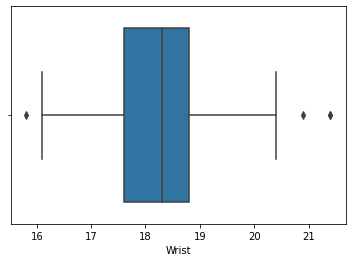

In [101]:
sns.boxplot(data=df, x = df['Wrist'])

### ----------------------------------------------------------------------------------------- 

# g)

### 1.Tippfehler und offensichtliche Messfehler löschen
Zunächst solltest Du einen Datencheck machen. Dazu berechnest Du die deskriptiven Maße (insbesondere Minimum und Maximum) Deiner metrischen Parameter und prüfst, ob alle Werte sinnvolle Werte sind. Anhand von Minimum und Maximum würdest Du erkennen, wenn es offensichtliche Messfehler (unmögliche Werte) oder Tippfehler in den Daten gibt, z.B. ein Patientenalter von 130. Diese Werte würdest Du entweder direkt löschen oder, wenn Du die Möglichkeit hast, verbesserst Du die Eingabe z.B. über eine Ansicht der Patientenakten.
bodyfat: min 0.00000%
Height: 29.500000 Zoll = 74.93 cm(wegen minage ist 22)

### 2. Ungewöhnliche Werte ausschließen
Wenn Du im nächsten Schritt immer noch ungewöhnliche Werte hast (ungewöhnlich hoch oder niedrig), ohne, dass diese Werte offensichtlich als Tipp- oder Messfehler bezeichnet werden können, betrachtest Du den Fall (Patient, Objekt), bei dem dieser Wert auftritt. Eventuell kannst Du diesen Fall als ungewöhnlichen Fall identifizieren, der nicht in Deine Stichprobe (also nicht in die Grundgesamtheit) passt. Das könnte zum Beispiel dann sein, wenn dieser extreme Wert bei einem Patienten auftritt, der bei genauerer Betrachtung seine Medikamente nicht eingenommen hat. Dann passt dieser Patient nicht in Deine Grundgesamtheit und Du schließt den Patient komplett aus der Analyse aus.

### 3. Verteilung prüfen und eventuell transformieren
Nun prüfst Du die Verteilung Deines Parameters. Zeigt sich eine Schiefe, so kannst Du Transformationen ausprobieren, um die Daten mit Hilfe der Transformation in eine annähernde Normalverteilung zu überführen. Dadurch können auch extreme Werte an die Daten angenähert werden, so dass Du nach der Transformation keine oder zumindest weniger Ausreißer hast.

### 4. Nicht-parametrische Methoden oder Bootstrapping verwenden
Wenn Du diese Schritte gegangen bist und immer noch Ausreißer hast, so wirst Du keine Methode verwenden können, die eine Normalverteilung voraussetzt. Denn mit Ausreißern sind Deine Daten nicht normalverteilt und die parametrischen Methoden werden durch Ausreißer beeinflusst: das Ergebnis ist nicht verlässlich.

Wenn Du eine einfache Analyse rechnest (z.B. einfacher Lageunterschied oder Korrelation), so kannst Du als Analysemethode die nicht-parameterische Methode wählen, die keine Normalverteilung voraussetzt und robust auf Ausreißer reagiert.

Wenn Du eine komplexere Analyse rechnest (z.B. ein mehrfaktorielles Design), dann gibt es meist keine nicht-parametrische Alternative. Dann kannst Du aber Deine ausgewählte Methode (z.B. ANOVA) zusätzlich mit Bootstrapping rechnen. Die Ergebnisse des Bootstrappings reagieren robust auf Ausreißer und sind demnach verlässlich, auch wenn Ausreißer in den Daten vorliegen.

### 5. Ausreißer aufgrund großer Residuen nach Daumenregel ausschließen
Zudem gibt es für manche Methoden Daumenregeln, nach denen Du Dich in der Untersuchung der Ausreißer richten kannst und nach denen Du auch zu große Ausreißer ausschließen kannst. Dabei ist es wichtig, dass es hier immer um die Ausreißer in einem Modell geht, das heißt, es werden nicht die Messwerte selbst betrachtet sondern die Residuen – die Abweichungen vom Modell.

Eine solche Daumenregel gibt es zum Beispiel für die lineare Regression. Hier soll es keine standardisierten Residuen größer als 3 oder kleiner als -3 geben. Es dürfen höchstens 1 % der standardisierten Residuen größer als 2,5 oder kleiner als -2,5 sein. Und nur 5 % dürfen größer als 2 oder kleiner als -2 sein. (Field, 2013)

Alle Fälle, deren Residuen aus diesen Bereichen heraus fallen, kannst Du anhand dieser Regel aus der Analyse heraus nehmen und das Modell nochmals rechnen.

#### Ich möchte hier nur Height = 29.5 löschen. andere outlier möchte ich nicht löschen, weil besondere Körperdaten ein ungewöhnliches Signal eines Menschen zeigen können.

# h)
1. Wenn alle normale Feature einer Daten zwischen 0 bis 1 liegen, komme ein Ausreißer 20. Vorher mean ist 0.5 auf, jetzt mean ist viele mehr als 0.5. Wenn ohne dieser Ausreißer, wird unser Model die Richtigkeit der Prognose erhöhen.
2. Angenommen, dass eine Patient 140 Blutdruck als Ausreißer (normale Blutdruck zwischen 80-120)hat. Wenn wir solche Ausreißer löschen, können wir nicht Krankheit richtig vorhersagen.